# MNIST 손글씨 - Deep Neural Network

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터전처리

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [ ]:
X_train.shape, X_test.shape
#((60000, 28, 28), (10000, 28, 28)) 2차원... 이걸1차원으로 펼쳐야 한다!!

((60000, 28, 28), (10000, 28, 28))

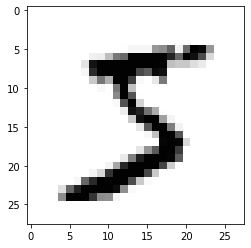

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys")
plt.show()

In [ ]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d ' % i)
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [ ]:
#0~1사이의 값으로 정규화
X_train = X_train.reshape(-1, 784) # (X_train.shape[0], 784)
X_train = X_train / 255.0
X_train.shape
#(60000, 784)

(60000, 784)

In [ ]:
#0~1사이의 값으로 정규화
X_test = X_test.reshape(-1, 784) 
X_test = X_test / 255.0
type(X_test[0,0])
#numpy.float64

numpy.float64

In [ ]:
Y_class_train[0]
#5로 나오는데..이걸 원핫인코딩해줘야한다!

5

In [ ]:
#원핫인코딩
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)
Y_train[0]
#원핫인코딩의결과array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 모델 정의, 설정, 학습

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
MODEL_DIR = './model/' 
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [ ]:
# 모델 프레임 설정
model = Sequential([
    Dense(512, input_dim=784, activation='relu'), #28*28 input_dim=784
    Dense(10, activation='softmax') #0~9까지 10개아웃풋
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [ ]:
#모델 최적화 설정
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=300, batch_size=200, verbose=0,  #위에 checkpointer가 verbose=1이니까
                    callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.17144, saving model to ./model/best001-0.1714.hdf5

Epoch 00002: val_loss improved from 0.17144 to 0.12331, saving model to ./model/best002-0.1233.hdf5

Epoch 00003: val_loss improved from 0.12331 to 0.10237, saving model to ./model/best003-0.1024.hdf5

Epoch 00004: val_loss improved from 0.10237 to 0.08751, saving model to ./model/best004-0.0875.hdf5

Epoch 00005: val_loss improved from 0.08751 to 0.08323, saving model to ./model/best005-0.0832.hdf5

Epoch 00006: val_loss did not improve from 0.08323

Epoch 00007: val_loss improved from 0.08323 to 0.07450, saving model to ./model/best007-0.0745.hdf5

Epoch 00008: val_loss did not improve from 0.07450

Epoch 00009: val_loss improved from 0.07450 to 0.07151, saving model to ./model/best009-0.0715.hdf5

Epoch 00010: val_loss did not improve from 0.07151

Epoch 00011: val_loss did not improve from 0.07151

Epoch 00012: val_loss did not improve from 0.07151

Epoch 00013: val_loss did not improv

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('./model/best009-0.0715.hdf5')

In [ ]:
# 테스트 정확도 출력 
acc = model.evaluate(X_test, Y_test, verbose=2)[1]
print(f"Test Accuracy: {acc:.4f}")
#그냥 머신러닝했을때 0.9767
#DNN 교수님은 0.98나오는데 나는 왜  Epoch30=0.9326->Epoch112=0.8804 ;;

313/313 - 1s - loss: 0.0639 - accuracy: 0.9798
Test Accuracy: 0.9798


### 훈련과정 시각화

In [ ]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

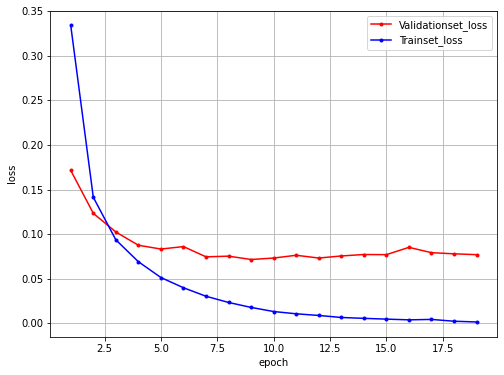

In [ ]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()